# **Waze Project - Exploratory Data Analysis**


# **Inspect and analyze data**

#### Overview

**Purpose** 

- This Notebook is to investigate and understand the data provided to gain comprehensive insights into its structure, content, and potential analytical value.

**Objective** 

- To create a Python-based dataframe for thorough data analysis, perform initial data assessment, and communicate findings to team members to inform strategic decision-making.
  
<br/>

*This analysis is organized into three sequential phases:*


**Phase 1: Contextual Understanding** 

- Assess the business context and requirements
- Identify key questions the data needs to answer
- Establish a structured approach for organizing and analyzing the information

**Part 2: Understand the data** 

- Construct a pandas dataframe optimized for analysis
- Generate descriptive statistics and summary metrics
- Document initial observations and potential areas of interest
- Identify data quality issues requiring attention

**Part 3: Variable Analysis** 

- Conduct targeted examination of key variables based on initial findings
- Explore relationships between variables
- Identify patterns, outliers, and potential insights
- Document variable characteristics to guide subsequent analysis


The insights gathered through this exploratory process will serve as the foundation for future statistical modeling, feature engineering, and machine learning development.

<br/>

### **Imports and data loading**
















In [147]:
# Import packages for data manipulation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [32]:
df = pd.read_csv('waze_dataset.csv')

### **Summary information**

- Initial Analysis of the Dataframe loaded in.

In [43]:
print('Shape of the DataFrame (Number of Rows, Number of Columns):\n', df.shape)

print('First 10 Rows of the DataFrame for Initial Inspection:\n', df.head(10))

print('Detailed Information About DataFrame Columns and Data Types:\n', df.info())

print('Descriptive Statistics for Numerical Variables (Count, Mean, Std, etc.):\n', df.describe())


Shape of the DataFrame (Number of Rows, Number of Columns):
 (14999, 13)
First 10 Rows of the DataFrame for Initial Inspection:
    ID     label  sessions  drives  total_sessions  n_days_after_onboarding  \
0   0  retained       283     226      296.748273                     2276   
1   1  retained       133     107      326.896596                     1225   
2   2  retained       114      95      135.522926                     2651   
3   3  retained        49      40       67.589221                       15   
4   4  retained        84      68      168.247020                     1562   
5   5  retained       113     103      279.544437                     2637   
6   6  retained         3       2      236.725314                      360   
7   7  retained        39      35      176.072845                     2999   
8   8  retained        57      46      183.532018                      424   
9   9   churned        84      68      244.802115                     2997   

   total_nav

### **Insights**

- The dataset has 700 missing values in the `label` column.
- The variables `label` and `device` are of type `object`; `total_sessions`, `driven_km_drives`, and `duration_minutes_drives` are of type `float64`; the rest of the variables are of type `int64`.
- There are 14,999 rows and 13 columns - medum-sized Dataset
- DataTypes appear to classified correctly

#### **Investigate Null values in Label column**

Firstly, we can use df.describe() again to compare the summary statistics of the 700 rows that are missing labels with summary statistics of the rows that are not missing any values.

**Question:** 

Is there a discernible difference between the two populations?

**Answer:**
> Comparing summary statistics of the observations with missing retention labels with those that aren't missing any values reveals nothing remarkable. The means and standard deviations are fairly consistent between the two groups.

In [66]:
# NUll DataSet 
null_df = df[df['label'].isnull()]
null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


In [68]:
# Not NUll DataSet 
not_null_df = df[~df['label'].isnull()]
not_null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


### **Null values - device counts**

Waze is either used on Android or iPhone, using the `device` variable, we can explore how many iPhone users had null values and how many Android users had null values?

In [97]:
print('Count of iPhone nulls and Android nulls:\n\n', null_df['device'].value_counts )


print('\n\nCalculate % of iPhone nulls and Android nulls:\n', 100 * null_df['device'].value_counts(normalize=True)  )

print('\n\nCalculate % of iPhone users and Android users in full dataset\n',  100 * df['device'].value_counts(normalize=True))

Count of iPhone nulls and Android nulls:

 <bound method IndexOpsMixin.value_counts of 77        iPhone
80        iPhone
98       Android
111      Android
142       iPhone
          ...   
14941     iPhone
14943     iPhone
14945    Android
14972     iPhone
14993     iPhone
Name: device, Length: 700, dtype: object>


Calculate % of iPhone nulls and Android nulls:
 device
iPhone     63.857143
Android    36.142857
Name: proportion, dtype: float64


Calculate % of iPhone users and Android users in full dataset
 device
iPhone     64.484299
Android    35.515701
Name: proportion, dtype: float64


#### Insights

The results show that there is not a major difference between `null` and `not-null`

### **Null values - Churn vs Retained**


Examine the counts and percentages of users who churned vs. those who were retained. How many of each group are represented in the data?

In [111]:
print('Count of Nulls - Retained and Churned:\n\n',df['label'].value_counts())
print('Count of Dataset - Retained and Churned:\n\n',df['label'].value_counts(normalize=True))

Count of Nulls - Retained and Churned:

 label
retained    11763
churned      2536
Name: count, dtype: int64
Count of Dataset - Retained and Churned:

 label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64


This dataset contains 82% retained users and 18% churned users.

Now comparing the medians of each variable for churned and retained users, so that outliers don't unduly affect the portrayal of a typical user. 

In [114]:
# Calculate median values of all columns for churned and retained users
df.groupby('label').median(numeric_only=True)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


Users who churned averaged ~3 more drives in the last month than retained users, but retained users used the app on over twice as many days as churned users in the same time period.

The median churned user drove ~200 more kilometers and 2.5 more hours during the last month than the median retained user.

It seems that churned users had more drives in fewer days, and their trips were farther and longer in duration. Perhaps this is suggestive of a user profile. 



#### Median kilometers per drive

Calculate the median kilometers per drive in the last month for both retained and churned users.

In [119]:
df['km_per_drive'] = df['driven_km_drives'] / df['drives']

# Group by `label`, calculate the median, and isolate for km per drive
median_km_per_drive = df.groupby('label').median(numeric_only=True)[['km_per_drive']]
median_km_per_drive

,km_per_drive
label,
churned,74.109416
retained,75.014702


The median retained user drove about one more kilometer per drive than the median churned user which doesn't stand out. 

Next, going to calculate how many kilometers per driving day was this?

In [123]:
# Add a column to df called `km_per_driving_day`
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# Group by `label`, calculate the median, and isolate for km per driving day
median_km_per_driving_day = df.groupby('label').median(numeric_only=True)[['km_per_driving_day']]
median_km_per_driving_day

,km_per_driving_day
label,
churned,697.541999
retained,289.549333


Now calculating the median number of drives per driving day for each group.

In [126]:
# Add a column to df called `drives_per_driving_day`
df['drives_per_driving_day'] = df['drives'] / df['driving_days']

# Group by `label`, calculate the median, and isolate for drives per driving day
median_drives_per_driving_day = df.groupby('label').median(numeric_only=True)[['drives_per_driving_day']]
median_drives_per_driving_day

,drives_per_driving_day
label,
churned,10.0000
retained,4.0625


The median user who churned drove 698 kilometers each day they drove last month, which is ~240% the per-drive-day distance of retained users. The median churned user had a similarly disproporionate number of drives per drive day compared to retained users.

It is clear from these figures that, regardless of whether a user churned or not, the users represented in this data drive considerable amounts! 

In consideration of how much these users drive, it would be worthwhile to recommend to Waze that they gather more data on these super-drivers. It's possible that the reason for their driving so much is also the reason why the Waze app does not meet their specific set of needs, which may differ from the needs of a more typical driver, such as a commuter.

Finally, examining whether there is an imbalance in how many users churned by device type.

In [138]:
# For each label, calculate the number of Android users and iPhone users
df.groupby(['label', 'device']).size()

label     device 
churned   Android     891
          iPhone     1645
retained  Android    4183
          iPhone     7580
dtype: int64

Now, within each group, churned and retained, calculate what percent was Android and what percent was iPhone.

In [141]:
# For each label, calculate the percentage of Android users and iPhone users
df.groupby('label')['device'].value_counts(normalize=True)*100

label     device 
churned   iPhone     64.865931
          Android    35.134069
retained  iPhone     64.439344
          Android    35.560656
Name: proportion, dtype: float64

The ratio of iPhone users and Android users is consistent between the churned group and the retained group, and those ratios are both consistent with the ratio found in the overall dataset.

### **Conclusion**

> *The dataset has 700 missing values in the `label` column. There was no obvious pattern to the missing values.*

> The median user who churned drove 698 kilometers each day they drove last month, which is about 240% the per-drive-day distance of retained users. It would be helpful to know how this data was collected and if it represents a non-random sample of users.*

> *Android users comprised approximately 36% of the sample, while iPhone users made up about 64%*

> *Generally, users who churned drove farther and longer in fewer days than retained users. They also used the app about half as many times as retained users over the same period.*

> *The churn rate for both iPhone and Android users was within one percentage point of each other. There is nothing suggestive of churn being correlated with device.*

# **Data Vizualisations**


**Purpose** 

Next we want to vizualise the data so we can understand the data better, spot outliers/ unusual behaviours and the relationships between the data better.

Here is a list of the Vizualisations used:

- Box Plots: Reveal data distribution patterns and identify outliers for continuous metrics like drives and sessions, showing where most user activity concentrates
- Histograms: Essential for understanding variable frequency distributions, highlighting common usage patterns and unusual behaviors
- Scatter Plots: Visualize relationships and correlations between different metrics, revealing potential connections between user behaviors
- Bar Charts: Effectively communicate quantities and levels across categories, making comparisons clear and accessible for stakeholders


In [159]:
# Useful Functions
def build_boxplot(size, data, column,fliers):
    plt.figure(figsize=size)
    sns.boxplot(x=data[column], fliersize=fliers)
    plt.title(f'{column} box plot')
    plt.show()


def build_histogram(column_str, median_text=True, **kwargs):    # **kwargs = any keyword arguments
                                                             # from the sns.histplot() function
    median=round(df[column_str].median(), 1)
    plt.figure(figsize=(5,3))
    ax = sns.histplot(x=df[column_str], **kwargs)            # Plot the histogram
    plt.axvline(median, color='red', linestyle='--')         # Plot the median line
    if median_text==True:                                    # Add median text unless set to False
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha='left', va='top', transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f'{column_str} histogram');

#### **`sessions`**

_The number of occurrences of a user opening the app during the month_

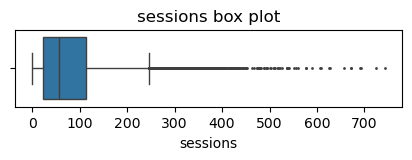

In [170]:
build_boxplot((5,1), df, 'sessions', 1) 

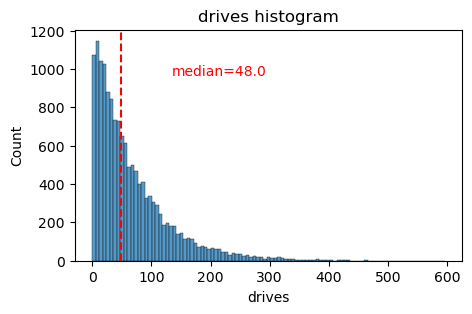

In [174]:
build_histogram('drives')